In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

In [13]:
data = datasets.fetch_openml(
    'mnist_784',
    version=1,
    return_X_y=True
)

pixel_values, targets = data
targets = targets.astype(int)
pixel_values = pixel_values.to_numpy()

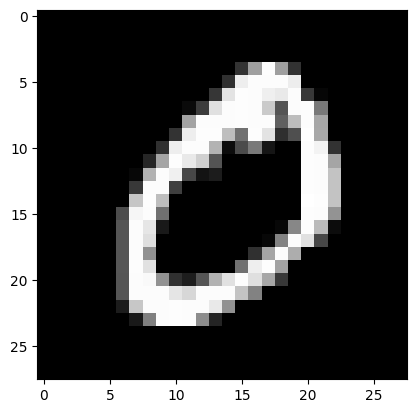

In [14]:
single_image = pixel_values[1,:].reshape(28,28)
plt.imshow(single_image, cmap='gray')

In [25]:
tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000,:])

/home/po/anaconda3/envs/AAMLP/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/po/anaconda3/envs/AAMLP/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [26]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["X", "y", "targets"]
)

# tsne_df.loc[:, targets] = tsne_df.targets.astype(int)

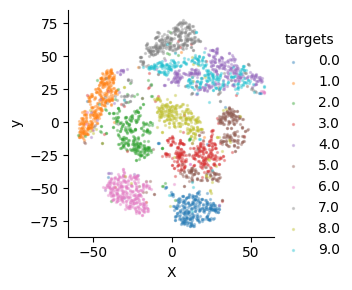

In [34]:
grid = sns.FacetGrid(tsne_df, hue="targets")
grid.map(plt.scatter, "X", "y", s=2, alpha=0.3).add_legend()